### Part 1: Blob Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# create a SIFT detector object
sift = cv2.SIFT_create()

print("SIFT parameters:")
print("nfeatures (0 means keep all detected keypoints):", sift.getNFeatures())
print("nOctaveLayers:", sift.getNOctaveLayers())
print("contrastThreshold:", sift.getContrastThreshold())
print("edgeThreshold:", sift.getEdgeThreshold())
print("sigma:", sift.getSigma())

SIFT parameters:
nfeatures (0 means keep all detected keypoints): 0
nOctaveLayers: 3
contrastThreshold: 0.04
edgeThreshold: 10.0
sigma: 1.6


In [7]:
# Load the image
image = cv2.imread('images/example-image.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Image shape: {image.shape}")
print(f"Gray image shape: {image_gray.shape}")

Image shape: (800, 640, 3)
Gray image shape: (800, 640)


In [13]:
# detect keypoints in the image
keypoints = sift.detect(image_gray, None)

print(f"Number of keypoints detected: {len(keypoints)}")
if len(keypoints) > 0:
    print("\nFirst Keypoint attributes:")
    kp = keypoints[0]
    print(f"  pt (x, y): {kp.pt}")
    print(f"  size: {kp.size}")
    print(f"  angle: {kp.angle}")
    print(f"  response: {kp.response}")
    print(f"  octave: {kp.octave}")
    print(f"  class_id: {kp.class_id}")
    print(f"\nFirst 5 keypoints:")
    for i, kp in enumerate(keypoints[:5]):
        print(f"  Keypoint {i}: pt={kp.pt}, size={kp.size:.2f}, angle={kp.angle:.2f}, response={kp.response:.2f}")

Number of keypoints detected: 387

First Keypoint attributes:
  pt (x, y): (25.05681800842285, 96.47417449951172)
  size: 22.159347534179688
  angle: 29.369735717773438
  response: 0.018905069679021835
  octave: 14615042
  class_id: -1

First 5 keypoints:
  Keypoint 0: pt=(25.05681800842285, 96.47417449951172), size=22.16, angle=29.37, response=0.02
  Keypoint 1: pt=(25.05681800842285, 96.47417449951172), size=22.16, angle=96.76, response=0.02
  Keypoint 2: pt=(25.05681800842285, 96.47417449951172), size=22.16, angle=247.10, response=0.02
  Keypoint 3: pt=(28.54822540283203, 385.4707946777344), size=21.00, angle=256.58, response=0.01
  Keypoint 4: pt=(29.529239654541016, 65.21958923339844), size=12.46, angle=170.64, response=0.02


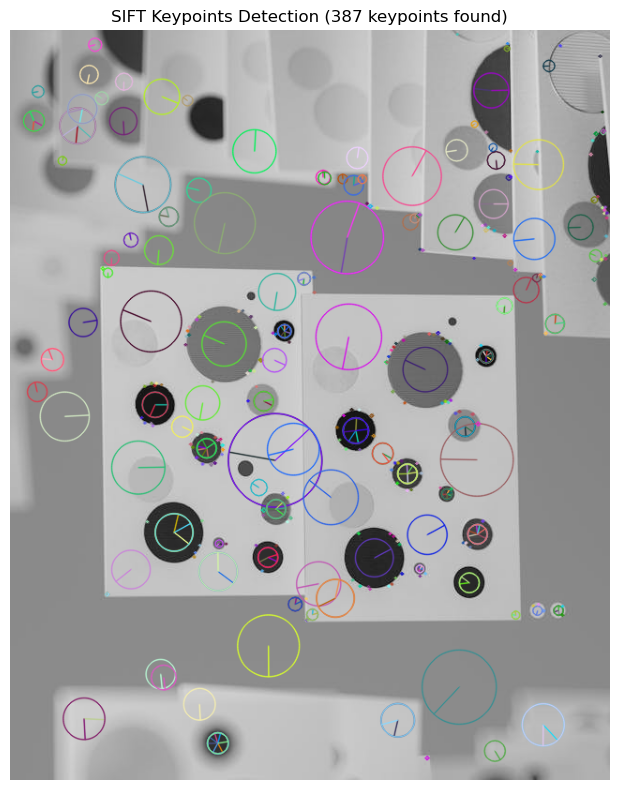

In [14]:
output_image = cv2.drawKeypoints(image_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display using matplotlib in grayscale
plt.figure(figsize=(12, 8))
plt.imshow(output_image, cmap='gray')
plt.title(f'SIFT Keypoints Detection ({len(keypoints)} keypoints found)')
plt.axis('off')
plt.tight_layout()
plt.show()

### Part 2: Tunning blob detection performance 

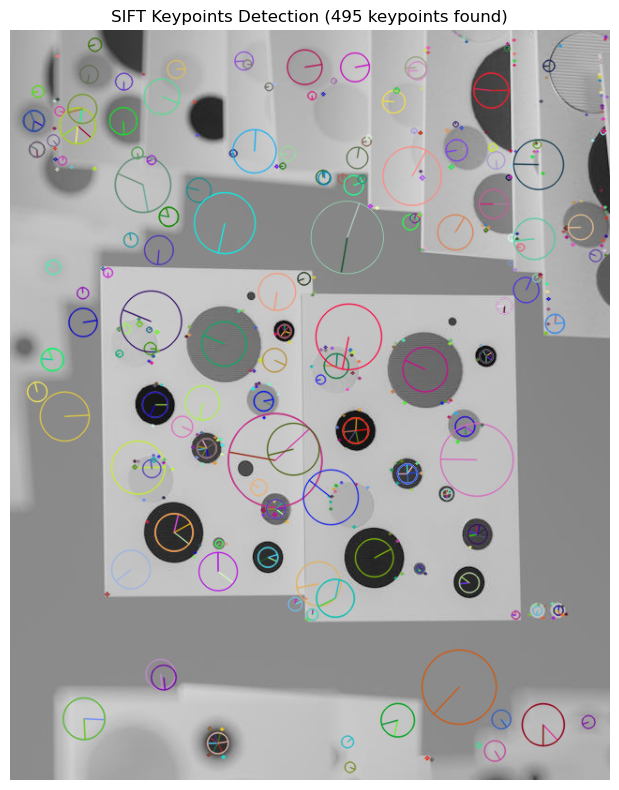

In [98]:
sift = cv2.SIFT_create(contrastThreshold = 0.01, edgeThreshold = 7)
keypoints = sift.detect(image_gray, None)
output_image = cv2.drawKeypoints(image_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display using matplotlib in grayscale
plt.figure(figsize=(12, 8))
plt.imshow(output_image, cmap='gray')
plt.title(f'SIFT Keypoints Detection ({len(keypoints)} keypoints found)')
plt.axis('off')
plt.tight_layout()
plt.show()

### Part 3: Descriptors

In [99]:
keypoints, descriptors = sift.compute(image_gray, keypoints)
# Select a keypoint (choose one with larger size for better visibility)
selected_idx = 0
for i, kp in enumerate(keypoints):
    if kp.size > 10:  # Find a keypoint with reasonable size
        selected_idx = i
        break

selected_kp = keypoints[selected_idx]
selected_descriptor = descriptors[selected_idx]

print(f"Selected Keypoint {selected_idx}:")
print(f"  Position (x, y): {selected_kp.pt}")
print(f"  Size (scale): {selected_kp.size:.2f}")
print(f"  Angle: {selected_kp.angle:.2f}")
print(f"  Response: {selected_kp.response:.4f}")
print(f"\nDescriptor shape: {selected_descriptor.shape}")
print(f"Descriptor (first 10 values): {selected_descriptor[:10]}")

Selected Keypoint 0:
  Position (x, y): (25.05681800842285, 96.47417449951172)
  Size (scale): 22.16
  Angle: 29.37
  Response: 0.0189

Descriptor shape: (128,)
Descriptor (first 10 values): [ 8. 16.  2.  8. 25.  7.  0.  0. 32. 26.]


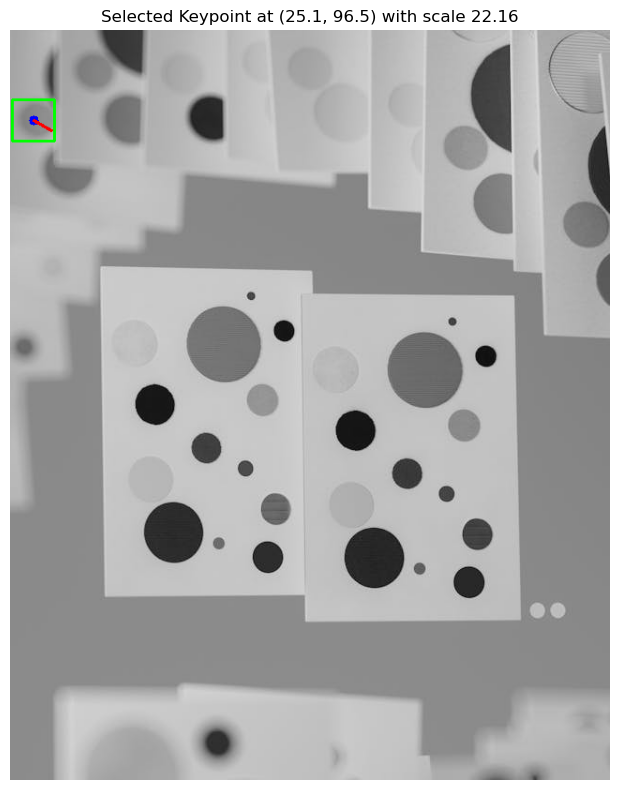

Rectangle dimensions: 44.32 x 44.32 pixels


In [100]:
# Create a copy of the image for drawing
image_with_patch = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

# Get keypoint location and size
x, y = selected_kp.pt
scale = selected_kp.size

patch_half_size = scale  # The radius of the keypoint circle

# Calculate rectangle corners
x1 = int(x - patch_half_size)
y1 = int(y - patch_half_size)
x2 = int(x + patch_half_size)
y2 = int(y + patch_half_size)

# Draw the rectangle around the patch
cv2.rectangle(image_with_patch, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw the keypoint at the center
cv2.circle(image_with_patch, (int(x), int(y)), 5, (255, 0, 0), -1)

# Draw orientation line
angle_rad = np.deg2rad(selected_kp.angle)
end_x = int(x + scale * np.cos(angle_rad))
end_y = int(y + scale * np.sin(angle_rad))
cv2.line(image_with_patch, (int(x), int(y)), (end_x, end_y), (0, 0, 255), 2)

# Display the result
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_with_patch, cv2.COLOR_BGR2RGB))
plt.title(f'Selected Keypoint at ({x:.1f}, {y:.1f}) with scale {scale:.2f}')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Rectangle dimensions: {2*patch_half_size:.2f} x {2*patch_half_size:.2f} pixels")

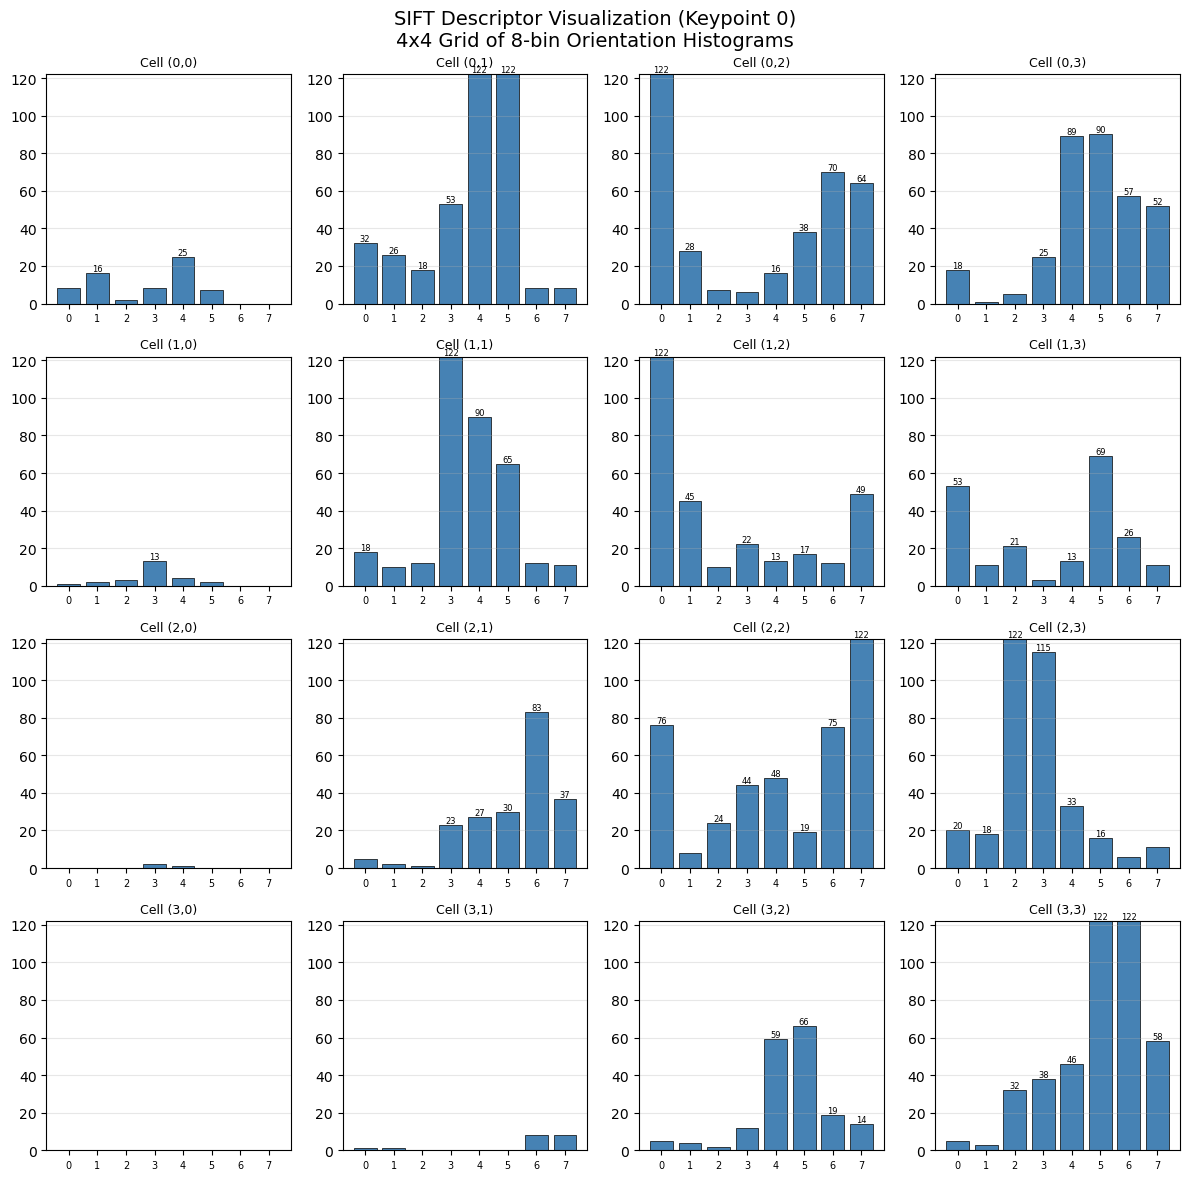


Descriptor Statistics:
  Total dimensions: 128
  Min value: 0.00
  Max value: 122.00
  Mean value: 28.11
  Std deviation: 35.43


In [101]:
# Visualize the 128-dimensional SIFT descriptor as a 4x4 grid of 8-bin histograms
# SIFT descriptor: 4x4 grid of cells, each with 8 orientation bins = 128 dimensions

# Reshape the descriptor into a 4x4x8 array
descriptor_reshaped = selected_descriptor.reshape(4, 4, 8)

# Create a figure with 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle(f'SIFT Descriptor Visualization (Keypoint {selected_idx})\n4x4 Grid of 8-bin Orientation Histograms', fontsize=14)

# Orientation bin labels (0° to 315° in 45° steps)
bin_labels = ['0°', '45°', '90°', '135°', '180°', '225°', '270°', '315°']

# Plot each 8-bin histogram in the 4x4 grid
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        histogram = descriptor_reshaped[i, j]
        
        # Create bar plot
        bars = ax.bar(range(8), histogram, color='steelblue', edgecolor='black', linewidth=0.5)
        
        # Customize subplot
        ax.set_title(f'Cell ({i},{j})', fontsize=9)
        ax.set_ylim(0, max(descriptor_reshaped.max(), 1))
        ax.set_xticks(range(8))
        ax.set_xticklabels(range(8), fontsize=7)
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars if they're significant
        for k, bar in enumerate(bars):
            height = bar.get_height()
            if height > descriptor_reshaped.max() * 0.1:  # Only label significant values
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.0f}', ha='center', va='bottom', fontsize=6)

plt.tight_layout()
plt.show()

print(f"\nDescriptor Statistics:")
print(f"  Total dimensions: {len(selected_descriptor)}")
print(f"  Min value: {selected_descriptor.min():.2f}")
print(f"  Max value: {selected_descriptor.max():.2f}")
print(f"  Mean value: {selected_descriptor.mean():.2f}")
print(f"  Std deviation: {selected_descriptor.std():.2f}")

### Part 4: Feature Matching

In [103]:
# Load both images
img1 = cv2.imread('images/example-image.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/example-image-transformed.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors for the first image
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)

# Detect keypoints and compute descriptors for the transformed image
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

print(f"Image 1: {len(keypoints1)} keypoints detected")
print(f"Image 2: {len(keypoints2)} keypoints detected")
print(f"Descriptors 1 shape: {descriptors1.shape}")
print(f"Descriptors 2 shape: {descriptors2.shape}")

Image 1: 496 keypoints detected
Image 2: 450 keypoints detected
Descriptors 1 shape: (496, 128)
Descriptors 2 shape: (450, 128)


In [104]:
# Create a Brute-Force Matcher
# cv2.NORM_L2 is used for SIFT and SURF descriptors (L2 distance)
# crossCheck=True means only return matches where descriptor A matches B and B matches A
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Find matches between descriptors from both images
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

print(f"Total matches found: {len(matches)}")
print(f"\nTop 5 matches:")
for i, match in enumerate(matches[:5]):
    print(f"  Match {i}: queryIdx={match.queryIdx}, trainIdx={match.trainIdx}, distance={match.distance:.2f}")

Total matches found: 219

Top 5 matches:
  Match 0: queryIdx=116, trainIdx=229, distance=18.76
  Match 1: queryIdx=136, trainIdx=249, distance=19.87
  Match 2: queryIdx=181, trainIdx=89, distance=21.59
  Match 3: queryIdx=435, trainIdx=417, distance=21.73
  Match 4: queryIdx=58, trainIdx=284, distance=22.91


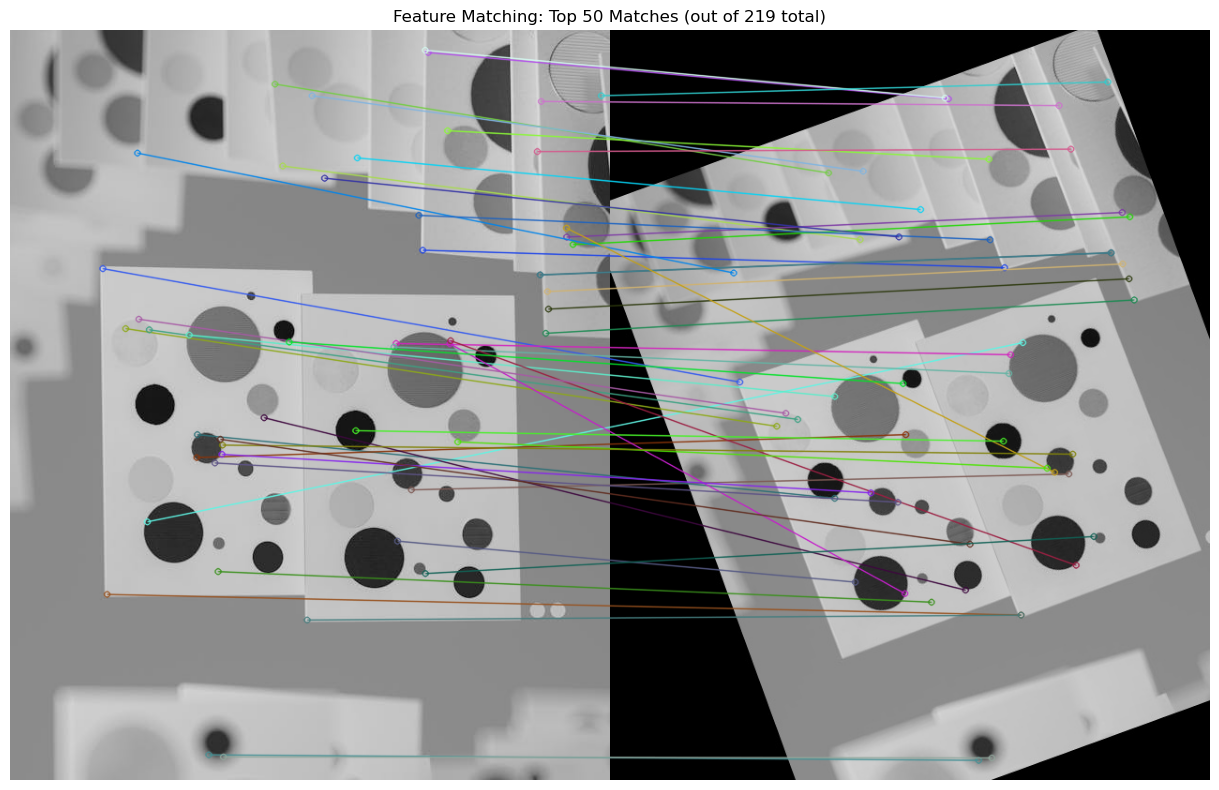


Match Distance Statistics:
  Minimum distance: 18.76
  Maximum distance: 391.66
  Mean distance: 110.54
  Median distance: 77.71


In [105]:
# Visualize the top 50 matches
num_matches_to_draw = min(50, len(matches))

matched_img = cv2.drawMatches(
    img1, keypoints1, 
    img2, keypoints2, 
    matches[:num_matches_to_draw], 
    None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Display the matched image
plt.figure(figsize=(16, 8))
plt.imshow(matched_img, cmap='gray')
plt.title(f'Feature Matching: Top {num_matches_to_draw} Matches (out of {len(matches)} total)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Display match statistics
distances = [m.distance for m in matches]
print(f"\nMatch Distance Statistics:")
print(f"  Minimum distance: {min(distances):.2f}")
print(f"  Maximum distance: {max(distances):.2f}")
print(f"  Mean distance: {np.mean(distances):.2f}")
print(f"  Median distance: {np.median(distances):.2f}")

### Part 5: SIFT matching with your own images

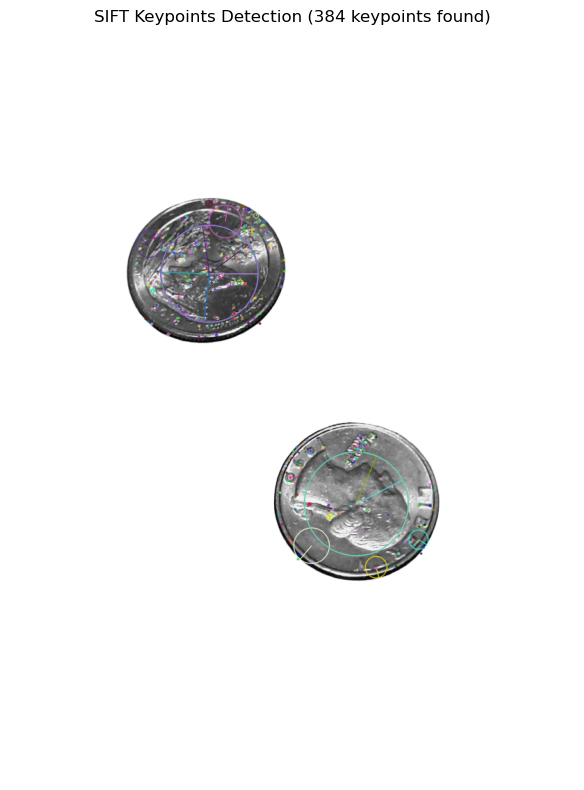

In [ ]:
# Image 1
img_cam1 = cv2.imread('images/img-cam1.png', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create(contrastThreshold = 0.15, edgeThreshold = 10)
keypoints = sift.detect(img_cam1, None)
output_image = cv2.drawKeypoints(img_cam1, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display using matplotlib in grayscale
plt.figure(figsize=(12, 8))
plt.imshow(output_image, cmap='gray')
plt.title(f'SIFT Keypoints Detection ({len(keypoints)} keypoints found)')
plt.axis('off')
plt.tight_layout()
plt.show()

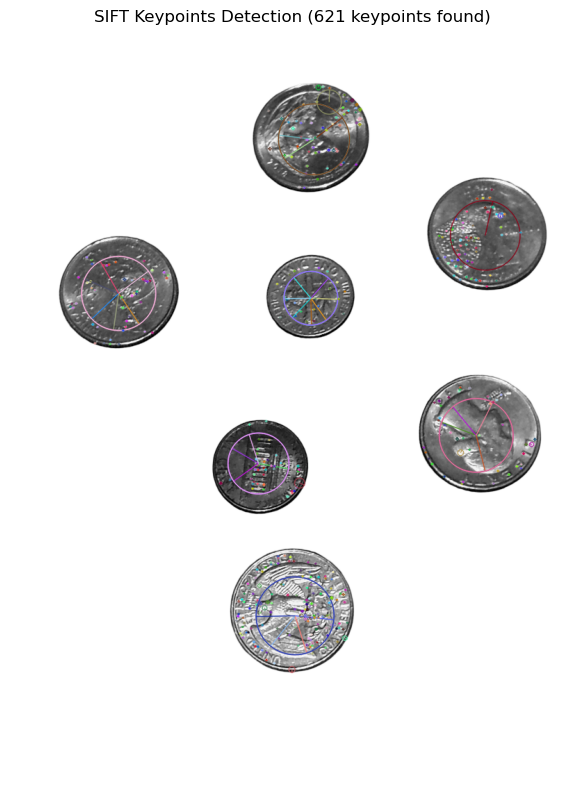

In [153]:
# Image 2
img_cam1 = cv2.imread('images/img-cam2.png', cv2.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create(contrastThreshold = 0.15, edgeThreshold = 5)
keypoints = sift.detect(img_cam1, None)
output_image = cv2.drawKeypoints(img_cam1, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display using matplotlib in grayscale
plt.figure(figsize=(12, 8))
plt.imshow(output_image, cmap='gray')
plt.title(f'SIFT Keypoints Detection ({len(keypoints)} keypoints found)')
plt.axis('off')
plt.tight_layout()
plt.show()